# Machine Vision<br>Assignment 1 - Camera calibration

## Personal details

* **Name(s):** `Hao Ban`
* **Student ID(s):** `2591928`

## 1. Introduction

This assignment focuses on the camera calibration. The aim is to determine the internal camera parameters (focal length, pricipal point, etc.) given a set of calibration images. We will use the pinhole camera model (lecture slide 20). With a pinhole model, we can project a 3D point $\mathbf{X}$ to an image point $\mathbf{x}$

$$\mathbf{x} \sim \mathbf{P} \mathbf{X}, \qquad \qquad (1)$$

where $\mathbf{P}$ is a projection matrix (3 $\times$ 4). The symbol $\sim$ denotes direct proportionality. The projection matrix can be decomposed as

$$\mathbf{P} = \mathbf{K} [\mathbf{R} | \mathbf{t} ], \qquad \qquad (2)$$

where $\mathbf{R}$ is a rotation matrix (3 $\times$ 3) and $\mathbf{t}$ is a translation vector (3 $\times$ 1). They define the orientation and the position of the camera. In this assignment, we are mainly interested on the intrinsic calibration matrix $\mathbf{K}$, which can be written as

$$
\mathbf{K}=
  \begin{bmatrix}
    f & 0 & c_x \\
    0 & f & c_y \\
    0 & 0 & 1
  \end{bmatrix}. \qquad (3)
$$

The focal length $f$ is the distance between the image plane and the camera center. The principal point $(c_x,c_y)$ is the image point, where the optical axis intersects the image plane.
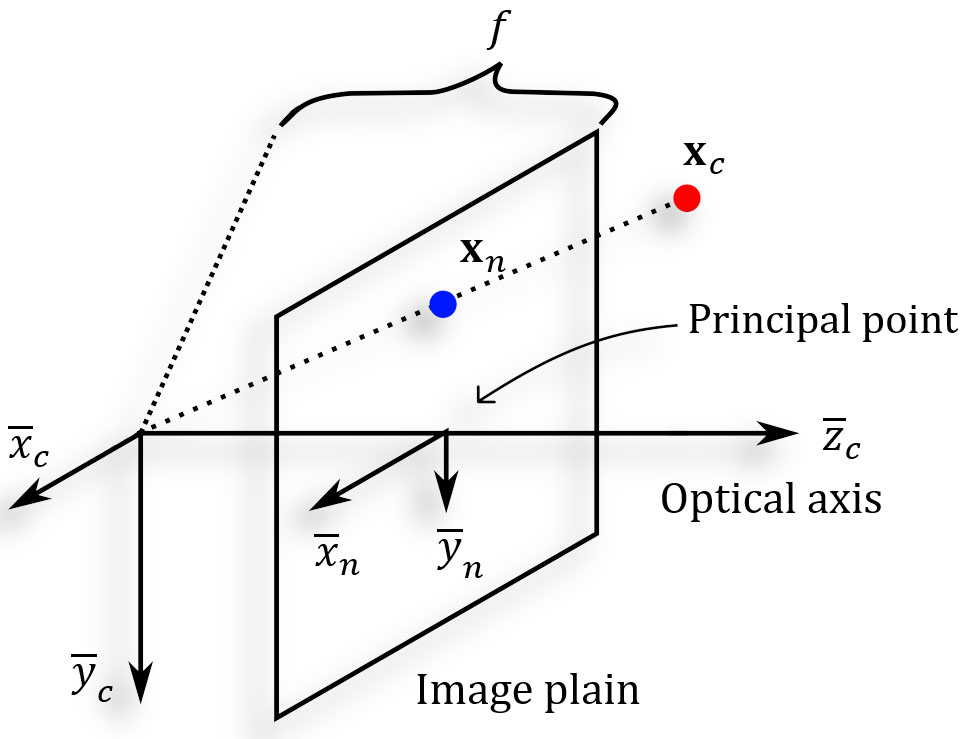

## 2. Focal length estimation

Let us start with a simple calibration experiment. Your goal is to determine the focal length $f$ given the perspective projection equations and realworld measurements shown in figure below. The size of the calibration object (checkerboard) is measured to be 373 x 259 millimeters and the corresponding pixel measurements are 497 x 343 pixels. The distance between the camera and the checkerboard is approximately 400 millimeters. Let $\mathbf{x}_c=[x_c,y_c,z_c]^\top$ be a 3D point in the camera coordinate frame. The perspective projection equations

$$x_n=f \frac{x_c}{z_c}, \qquad y_n=f \frac{y_c}{z_c} \qquad \qquad (1)$$

give us the corresponding 2D point $\mathbf{x}_n=[x_n,y_n]^\top$ in the normalized image coordinates. To determine the focal length, solve $f$ from the projection equations. You can compute the focal length separately for x and y-directions (values should be similar) and report the mean value.

**2.1. The focal length is `531.35` (pixels)** $\quad$ <font color=red>(0.50 points)</font> 

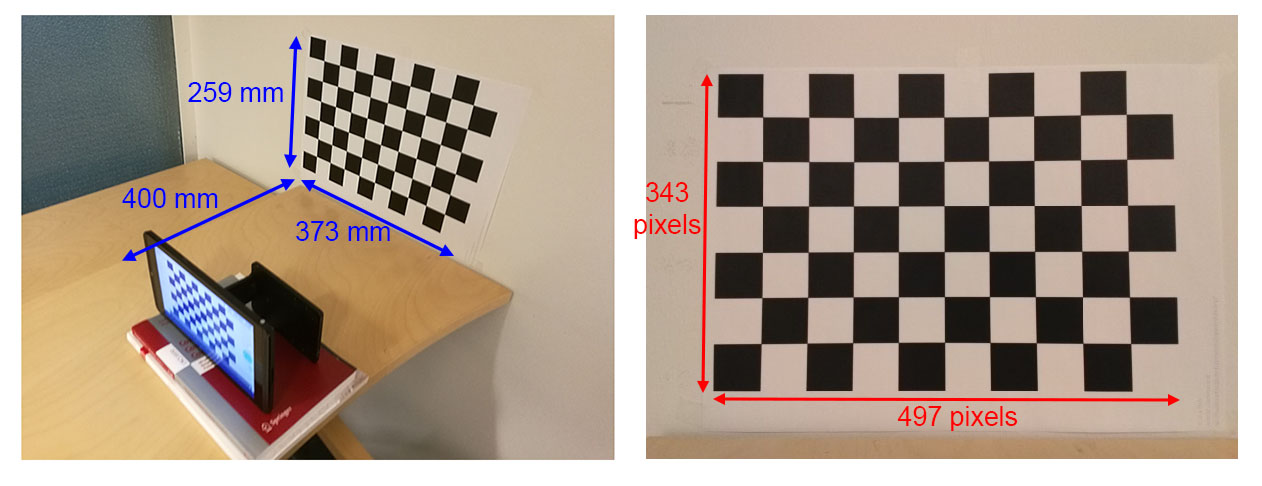


## 3. Direct linear transformation (DLT)

The previous calibration method is quite sensitive to errors as it relies heavily on the manual measurements. Furthermore, it is difficult to ensure that the back of the camera and the checkerboard are parallel. In this section, your task is to implement the direct linear transformation (DLT) method for camera calibration. It is recommended that you first read the lecture slides (194-195) to get an idea of the method. This time, the calibration object will be a cube that is shown below. The dimensions of the cube are known (sides are 195 millimeters).

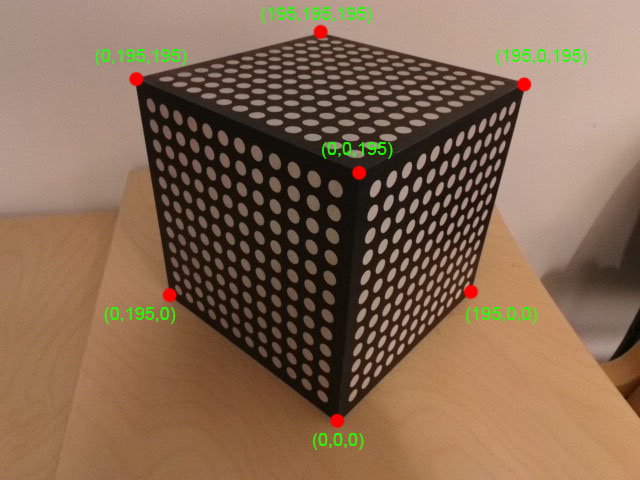

**3.1. Display the image `cube.jpg` and overlay the 2D points** <font color=red>(0.25 points)</font>

Complete the following code cell.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Image coordinates of the corners (7x2 matrix)
pts2D = np.array([[322.4, 33.5],
                  [136.5, 79.4],
                  [525.2, 83.8],
                  [361.3, 173.6],
                  [170.4, 295.4],
                  [473.1, 290.4],
                  [338.7, 422.3]])


# ---------- YOUR CODE STARTS HERE -----------
c=[0 for i in range(len(pts2D))]
r=[0 for i in range(len(pts2D))]

for i in range(len(pts2D)):
    c[i] = pts2D[i][0]
    r[i] = pts2D[i][1]
# print (c)
img = cv2.imread(".\images\cube.jpg")
plt.imshow(img)
plt.plot(c,r, 'ro')

# ----------- YOUR CODE ENDS HERE ------------

*Tip:* You can use the plot function __[`pyplot.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)__ to overlay the points. For example, a red circle marker can be specified by passing the parameter 'ro'.

**3.2. Estimate the projection matrix** $\quad$ <font color=red>(1.00 points)</font> 

Complete the following code cell.

In [ ]:
# World coordinates of the corners (7x3 matrix)
pts3D = np.array([[195.0, 195.0, 195.0],
                  [0.0, 195.0, 195.0],
                  [195.0, 0.0, 195.0],
                  [0.0, 0.0, 195.0], 
                  [0.0, 195.0, 0.0],
                  [195, 0.0, 0.0],
                  [0.0, 0.0, 0.0]])


# ---------- YOUR CODE STARTS HERE -----------

# Form matrix A and vector b (linear system Ax = b)

x=[0 for i in range(len(pts3D))]
y=[0 for i in range(len(pts3D))]
z=[0 for i in range(len(pts3D))]

for i in range(len(pts3D)):
    x[i] = pts3D[i][0]
    y[i] = pts3D[i][1]
    z[i] = pts3D[i][2]


    
A = np.array([[x[0],y[0],z[0],1,0,0,0,0,-x[0]*c[0],-y[0]*c[0],-z[0]*c[0]],
              [0,0,0,0,x[0],y[0],z[0],1,-x[0]*r[0],-y[0]*r[0],-z[0]*r[0]],
              [x[1],y[1],z[1],1,0,0,0,0,-x[1]*c[1],-y[1]*c[1],-z[1]*c[1]],
              [0,0,0,0,x[1],y[1],z[1],1,-x[1]*r[1],-y[1]*r[1],-z[1]*r[1]],
              [x[2],y[2],z[2],1,0,0,0,0,-x[2]*c[2],-y[2]*c[2],-z[2]*c[2]],
              [0,0,0,0,x[2],y[2],z[2],1,-x[2]*r[2],-y[2]*r[2],-z[2]*r[2]],
              [x[3],y[3],z[3],1,0,0,0,0,-x[3]*c[3],-y[3]*c[3],-z[3]*c[3]],
              [0,0,0,0,x[3],y[3],z[3],1,-x[3]*r[3],-y[3]*r[3],-z[3]*r[3]],
              [x[4],y[4],z[4],1,0,0,0,0,-x[4]*c[4],-y[4]*c[4],-z[4]*c[4]],
              [0,0,0,0,x[4],y[4],z[4],1,-x[4]*r[4],-y[4]*r[4],-z[4]*r[4]],
              [x[5],y[5],z[5],1,0,0,0,0,-x[5]*c[5],-y[5]*c[5],-z[5]*c[5]],
              [0,0,0,0,x[5],y[5],z[5],1,-x[5]*r[5],-y[5]*r[5],-z[5]*r[5]],
              [x[6],y[6],z[6],1,0,0,0,0,-x[6]*c[6],-y[6]*c[6],-z[6]*c[6]],
              [0,0,0,0,x[6],y[6],z[6],1,-x[6]*r[6],-y[6]*r[6],-z[6]*r[6]]])

b = np.array([c[0],r[0],c[1],r[1],c[2],r[2],c[3],r[3],c[4],r[4],c[5],r[5],c[6],r[6]])



# print(b)
# Find the least-squares solution x


x = np.dot(np.dot(np.linalg.inv(np.dot(A.transpose(),A)),A.transpose()),b)


# Rearrange vector x to 3x4 projection matrix P

x = np.append(x, 1)
# print (x)
P = x.reshape(3,-1)

# Print the projection matrix P
print (P)

# ----------- YOUR CODE ENDS HERE ------------

*Tips:* 
- Check the lecture slide (195) on how to form the matrix $\mathbf{A}$ (14 x 11) and vector $\mathbf{b}$ (14 x 1).
- You can take the inverse of a matrix by `np.linalg.inv(M)`
- To rearrage the vector $\mathbf{x}$, you can use `x.reshape(3,-1)`. Note that x should have 12 elements (the last element should be 1).

**3.3. Decompose the projection matrix** $\quad$ <font color=red>(0.25 points)</font>

Complete the following code cell and report the focal length. It should be relatively close to the value obtained in Task 2.1.

In [ ]:
# ---------- YOUR CODE STARTS HERE -----------

# Decompose P to intrinsic matrix K using cv2.decomposeProjectionMatrix()
K = cv2.decomposeProjectionMatrix(P)[0]
                                    
# print(K)

# Normalize K so that the last element K[2,2] equals 1.
K = K/K[2,2]

# Print the intrinsic matrix K

print(K)


# ----------- YOUR CODE ENDS HERE ------------

**The focal length is `INSERT YOUR ANSWER HERE` (pixels)** $\quad$

## 4. Camera calibration with OpenCV

Finally, we calibrate the same camera using OpenCV. We use a set of 8 images of a checkerboard. This time, we also take into account the radial distortion. You can check your previous answers by running the following code cell. Your answers should be relatively close to the ones shown at the end of this script. Check out the tutorial for more information __[`OpenCV calibration tutorial`](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_calib3d/py_calibration/py_calibration.html)__

In [ ]:
import glob

images = glob.glob('images/calib*.jpg')

img_idx = 1
plt.figure(figsize=(14,20))

# World points (0,0,0), (1,0,0), (2,0,0), ....
Xw = np.zeros((6*9,3), np.float32)
Xw[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

pts2D = [];
pts3D = [];

for fname in images:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    # Find chessboard corners
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret == True:
    
        # Refine corner locations
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners = cv2.cornerSubPix(gray,corners,(11,11), (-1,-1), criteria)
    
        # Draw corners to the image
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
    
        # Append points
        pts2D.append(corners)
        pts3D.append(Xw)
    
    # Display corners
    plt.subplot(4,2,img_idx)
    plt.imshow(img)
    plt.axis('off')
    plt.title(fname)
    img_idx = img_idx + 1
    
# Perform calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(pts3D,pts2D,gray.shape[::-1],None,None)

# Correct radial distortion
img = cv2.imread("images/calib0001.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
img_rect = cv2.undistort(img, mtx, dist, None, newcameramtx)

plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_rect)
plt.title('Rectified')
plt.axis('off')

print('Intrinsic camera matrix:\n')
print(newcameramtx)

# Aftermath
Fill your answers to the following questions:

**How much time did you need to complete this exercise?**

`3 hours.`

**Did you experience any problems with the exercise? Was there enough help available? Should this notebook be more (or less) detailed?**

`In this exercise, information is enough. However, I need more time to understand theory in it.`

# References
`https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv.DecomposeProjectionMatrix`

# Submission

1. Click on the menu `Kernel -> Restart & Clear Output` to clear all outputs and variables, etc.
2. Compress the resulting Jupyter notebook (`MV_A1.ipynb` file) into **`MV_A1_[student number(s)].zip`** (e.g. `MV_A1_1234567.zip` if solo work or `MV_A1_1234567-7654321.zip` if pair work).
3. Send an email to janne.mustaniemi@oulu.fi with the subject line `MV_A1_[student number(s)]`. Remember to attach the .zip file.

**Deadline of the assignment 21.1.2019**